## Recommender System(추천시스템)

오류 해결 목록  
  
<span style='background-color: #dcffe4'>(1) pip 버전 오류</span>  
[pip --version]으로 버전 확인  
[pip install --upgrade pip]으로 pip 버전 업그레이드 
  
<span style='background-color: #dcffe4'>(2) scikit-surprise 설치 오류</span>  
[Visual Studio] 설치  
[pip install --upgrade joblib]으로 joblib 버전 업그레이드

라이브러리 목록

In [17]:
#Visual Studio 설치해서 Surprise 설치 오류 해결!!!! 
!pip install scikit-surprise

  Using cached scikit-surprise-1.1.3.tar.gz (771 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.3-cp38-cp38-win_amd64.whl size=1094683 sha256=c388ddb7db603c51913d02f3eccea23fa937564e628773f71ebb3b74b7d77aaf
  Stored in directory: c:\users\user\appdata\local\pip\cache\wheels\af\db\86\2c18183a80ba05da35bf0fb7417aac5cddbd93bcb1b92fd3ea
Successfully built scikit-surprise


In [2]:
from IPython.display import Image

#Surprise 설치 후
from surprise import SVD
from surprise import Dataset
from surprise import accuracy
from surprise.model_selection import train_test_split
from surprise.dataset import DatasetAutoFolds
import os
import pandas as pd
import numpy as np
from surprise import Reader

### <span style='background-color: #dcffe4'>(1) Surprise를 이용한 잠재 요인 협업 필터링 : Book-Crossing</span>
- https://hipster4020.tistory.com/115
- 약 271,379권의 도서에 대해 1,149,780 등급을 제공하는 278,858명의 사용자를 포함하는 메타 데이터
- Surprise를 이용한 추천 시스템은 데이터를 학습용과 테스트용 데이터 세트로 분리한 뒤, SVD 행렬 분해를 통해 잠재 요인 협업 필터링 수행
- 행렬 분해 기법을 통해 '사용자-아이템 평점 행렬'을 사용자의 Latent Factor, 아이템의 Latent Factor로 분해
- 그 과정에서 사용자가 예측하지 않은 아이템에 대한 평점이 도출되는 방식!!!!!!!!!! Sparse cell이 채워지게 된다.

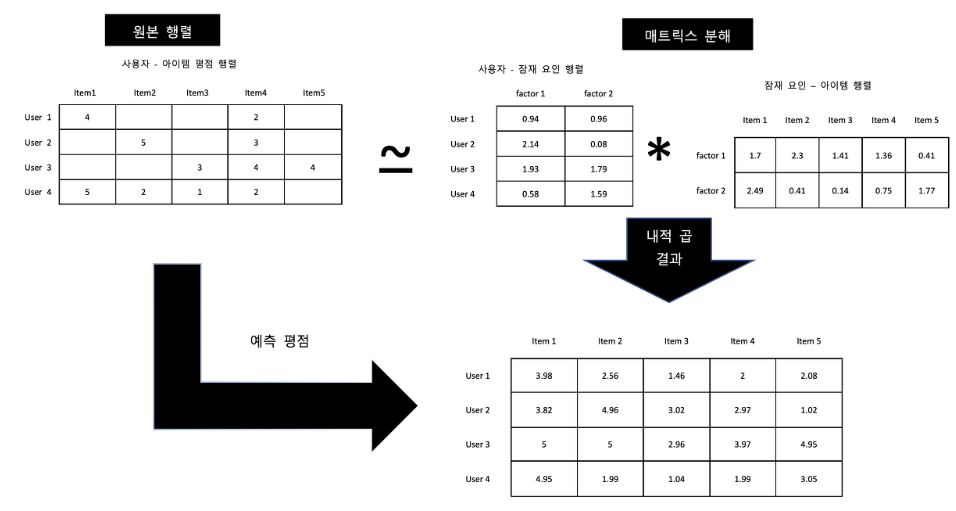

In [42]:
ratings = pd.read_csv('BX-Book-Ratings.csv', encoding='cp949')
books = pd.read_csv('BX_Books.csv', encoding='cp949')
bookratings = pd.merge(ratings, books, on='ISBN')
books.rename(columns={'Book-Title':'title', 'ISBN':'item'}, inplace=True)

C:\Users\user\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (3,8,9,10,11,12,13,14,15,16,17,18,19,20,21) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


  
  - 아래를 확인해보면 사용자-아이템(도서, ISBN/Book-Title)별 평점이 들어있음 

In [45]:
bookratings

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2313,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6543,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8680,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10314,034545104X,9.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941154,250764,440106575,0.0,HIDDEN FIRES,JANETTE RADCLIFFE,1978,Dell,http://images.amazon.com/images/P/0440106575.0...,http://images.amazon.com/images/P/0440106575.0...,http://images.amazon.com/images/P/0440106575.0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941155,250764,451157516,0.0,Cheyenne (Fortunes West,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941156,250764,048623715X,0.0,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982,Dover Publications,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,http://images.amazon.com/images/P/048623715X.0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941157,250764,486256588,0.0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988,Dover Publications,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...,http://images.amazon.com/images/P/0486256588.0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
bookratings.to_csv('Book-Ratings_noh.csv', index=False, header=False)

In [62]:
bookratings.columns  #컬럼은 총 24개, 필요없는건 11부터

Index(['User-ID', 'ISBN', 'Book-Rating', 'Book-Title', 'Book-Author',
       'Year-Of-Publication', 'Publisher', 'Image-URL-S', 'Image-URL-M',
       'Image-URL-L', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21'],
      dtype='object')

In [70]:
data = bookratings.iloc[:, 0:10]
data.head(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,2313,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
2,6543,034545104X,0.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
3,8680,034545104X,5.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
4,10314,034545104X,9.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...


- **데이터 분할 후 학습**

In [77]:
col='user item rating'
reader=Reader(line_format=col, sep=',', rating_scale=(1,10))
data=Dataset.load_from_file('Book-Ratings_noh.csv', reader=reader)

In [81]:
#데이터 분할
trainset, testset = train_test_split(data, test_size=.25, random_state=0)

algo = SVD(n_factors=50, random_state=0)
algo.fit(trainset)
predictions=algo.test(testset)
accuracy.rmse(predictions)

RMSE: 3.5246


3.52456419523457

- **전체 데이터 학습**

In [84]:
col='user item rating'
data_folds = DatasetAutoFolds(ratings_file='Book-Ratings_noh.csv', reader=reader)
trainset=data_folds.build_full_trainset()

algo=SVD(n_epochs=20, n_factors=50, random_state=0)
algo.fit(trainset)

In [91]:
#특정 사용자에 대해서 특정 도서 추천을 하기 위해, 이미 평점이 입력되어있는지 확인
ISBNs = bookratings[bookratings['User-ID']==9]['ISBN']
if ISBNs[ISBNs=='034545104X'].count()==0:
    print('해당 사용자는 034545104X 도서에 평점 없음')
    
print('이와 같이 사용자-아이템 평점 행렬에 평점이 없는 경우가 있음')

해당 사용자는 034545104X 도서에 평점 없음
이와 같이 사용자-아이템 평점 행렬에 평점이 없는 경우가 있음


- 사용자가 평점을 매기지 않은 전체 도서 추출 후, 예측 평점 순으로 도서 추천

In [94]:
def get_unread_surprise(bookratings, books, userId):
    read_books = bookratings[bookratings['User-ID']==userId]['ISBN'].tolist()
    total_books = books['item'].tolist()
    unread_books = [book for book in total_books if book not in  read_books]
    print('평점 매긴 도서 수 :', len(read_books), ', 추천 대상 도서 수 :', len(unread_books),
          ', 전체 도서 수 :', len(total_books))
    return unread_books

unread_books = get_unread_surprise(bookratings, books, 276847)

평점 매긴 도서 수 : 47 , 추천 대상 도서 수 : 271332 , 전체 도서 수 : 271379


- 사용자-아이템 행렬에 존재하지만, 276847 사용자가 평점을 입력하지 않은 도서 수는 271,332개

In [102]:
def recomm_book_by_surprise(algo, userId, unread_books, top_n=10):

  # 알고리즘 객체의 predict() 메서드를 평점이 없는 영화에 반복 수행한 후 결과를 list 객체로 저장
  predictions = [algo.predict(str(userId), str(item)) for item in unread_books]
  
  # predictions list 객체는 surprise의 Prediction 객체를 원소로 가지고 있음.
  # [Prediction(uid='276847', iid='1', est=3.69), Prediction(uid='276847', iid='2', est=2.98),,,,]

  # 이를 est 값으로 정렬하기 위해서 아래의 sortkey_eat 함수를 정의함.
  # sortkey_est 함수는 list 객체의 sort() 함수의 키 값으로 사용되어 정렬 수행.
  def sortkey_est(pred):
    return pred.est
    
  # sortkey_est() 반환값의 내림 차순으로 정렬 수행하고 top_n개의 최상위 값 추출.
  predictions.sort(key=sortkey_est, reverse=True)
  top_predictions = predictions[:top_n]

  # top_n으로 추출된 영화의 정보 추출, 영화 아이디, 추천 예상 평점, 제목 추출
  top_book_ids = [ pred.iid for pred in top_predictions]
  top_book_rating = [ pred.est for pred in top_predictions]
  top_book_titles = bookratings[bookratings.ISBN.isin(top_book_ids)]['Book-Title']

  top_book_preds = [ (id, rating) for id, rating in 
                      zip(top_book_ids, top_book_rating)]
  return top_book_preds

unread_books = get_unread_surprise(bookratings, books, 276847)
top_book_preds = recomm_book_by_surprise(algo, 276847, unread_books, top_n=10)

print('  ')
print('  ')
print('***************************')
print('*** 추천 영화 리스트 Top 10 ***')
print('  ')
for top_book in top_book_preds :
  print(top_book[0], ":", top_book[1])

평점 매긴 도서 수 : 47 , 추천 대상 도서 수 : 271332 , 전체 도서 수 : 271379
  
  
***************************
*** 추천 영화 리스트 Top 10 ***
  
446310786 : 10
446605484 : 10
151008116 : 10
571197639 : 10
312995423 : 10
380012863 : 10
014023828X : 10
345424719 : 10
805063897 : 10
156027321 : 10


In [107]:
list=['446310786','446605484','151008116','571197639','312995423','380012863','014023828X','345424719','805063897','156027321']
bookstitle=books[books.item.isin(list)]
bookstitle.iloc[:,0:5]

,item,title,Book-Author,Year-Of-Publication,Publisher
37,446310786,To Kill a Mockingbird,Harper Lee,1988,Little Brown & Company
225,446605484,Roses Are Red (Alex Cross Novels),James Patterson,2001,Warner Vision
246,151008116,Life of Pi,Yann Martel,2002,Harcourt
288,571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc
358,312995423,Digital Fortress : A Thriller,Dan Brown,2003,St. Martin's Press
389,380012863,Jonathan Livingston Seagull,Richard Bach,1976,Avon
475,014023828X,The Tortilla Curtain,T. Coraghessan Boyle,1996,Penguin Books
477,345424719,A Widow for One Year,JOHN IRVING,1999,Ballantine Books
487,805063897,Nickel and Dimed: On (Not) Getting By in America,Barbara Ehrenreich,2002,Owl Books
563,156027321,Life of Pi,Yann Martel,2003,Harvest Books


### 방향성  
- 협업필터링(사용자기반/아이템기반/잠재요인)의 경우 사용자-아이템 평점 행렬이 기반이 되는데, 한 사용자가 특정 아이템을 사면 사이즈는 딱 하나만 구매하게 되고, 여러 사이즈에 대한 평점 데이터를 얻을 수 없음
- 열을 아이템사이즈별로 행렬을 생성한다하면 너무 Sparse한 행렬이 되지 않나?
- 사용자-아이템 평점 행렬을 우리 버전으로 새로 정의해야함, 그렇다면 평점은 어떤 수치로 잡을 건지?
- 사용자가 남긴 리뷰 데이터를 어떻게 활용할 건지, 클러스터링에 수치화해서 넣을건지, 클러스터링에 사용할 컬럼 정의
- 사용자-아이템 평점 행렬에 사용할 수치는 어떤 걸로 뽑아낼건지

------

### <span style='background-color: #dcffe4'>(2) ADV ver. 사용자-아이템 평점 행렬 생성</span>

In [12]:
df = pd.read_csv('[ADV][김주은] 무탠다드-바지-2차크롤링.csv', encoding='cp949')
df = df.drop(['Unnamed: 0'], axis=1)
df.head(5)

,user,gender,height,weight,item,size,star,content,size_eval,bright_eval,color_eval,thick_eval
0,LV 4 뉴봉,남성,180cm,85kg,테이퍼드 히든 밴딩 크롭 슬랙스 [다크 브라운],34,4,무신사 슬랙스 평이 좋아서 구매해봤습니다. 색과 퀄리티 두께감 다 마음에 들었는데 ...,보통이에요,어두워요,선명해요,두꺼워요
1,LV 4 뉴비루키맴버,남성,178cm,90kg,테이퍼드 히든 밴딩 크롭 슬랙스 [다크 그레이],36,5,무탠다드 슬랙스 편안하니 좋아요가볍게 입기 좋아요큰사이즈도 있어 만족해요,보통이에요,보통이에요,보통이에요,보통이에요
2,LV 4 뉴비루키맴버,남성,178cm,90kg,테이퍼드 히든 밴딩 크롭 슬랙스 [차콜 그레이],36,5,무탠다드 슬랙스 편안하니 좋아요가볍게 입기 좋아요큰사이즈도 있어 만족해요,보통이에요,보통이에요,보통이에요,보통이에요
3,LV 4 J___park,남성,176cm,72kg,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙],31,4,바지자체는 너무 예쁘고 스판도 좋아요 하지만 허벅지 좀 있는분들은 한치수 업 추천드...,보통이에요,보통이에요,보통이에요,보통이에요
4,LV 5 맨동야,남성,181cm,76kg,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙],32,5,참 좋아요두번째 구매인데 기본 가성비템으로좋습니다,보통이에요,보통이에요,보통이에요,보통이에요


In [234]:
df.shape

(980, 12)

- **중복되는 열 있는지 확인하고, 중복되는 경우 삭제**

In [13]:
df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
df.shape

(792, 12)

- **<span style='background-color: #dcffe4'>열 생성!!!</span>**
- **지정한 아이템에 대해서 사이즈 범주값 정렬 후 열에 지정하기**
- **크롤링한 데이터에서 범주값을 설정하는 건, 이후 <span style='background-color: #dcffe4'>'아이템에 대한 메타데이터'</span> 크롤링!!!!!**
-   
- **실제로 해당 상품인 '테이퍼드 히든 밴딩 크롭 슬랙스' 사이즈는 1단위로 26~34까지+36/38/40/42 존재**

In [5]:
#size = df['size'].value_counts().index.tolist()
size = [26,27,28,29,30,31,32,33,34,36,38,40,42]
size.sort()
size

[26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 38, 40, 42]

- **<span style='background-color: #dcffe4'>행 생성!!!</span>**

- **살펴보면 347개의 키-몸무게 조합이 존재했고, 여러명이 겹치는 조합은 아래와 같았음 (성별 고려 X)**

In [384]:
#중복되는 열 삭제했을때, 인덱싱 다시 설정해주기(key error 발생)(주의!!!!!!!!!!!!)
df.reset_index(drop=True, inplace=True)

import re
#키와 몸무게에 대한 수치만 추출(문자 기준 정렬하면 100이 30보다 작게 설정됨)
df['n_height']=[int(re.sub(r'[^0-9]', '', df['height'][i])) for i in range(0,df.shape[0])]
df['n_weight']=[int(re.sub(r'[^0-9]', '', df['weight'][i])) for i in range(0,df.shape[0])]

#키와 몸무게로 데이터프레임 재정렬(오름차순 정렬)
df.sort_values(by=['n_height','n_weight'], ascending=[True, True], inplace=True)
df.reset_index(drop=True, inplace=True)
df['hw'] = [str(df['n_height'][i])+'-'+str(df['n_weight'][i]) for i in range(0,df.shape[0])]
pd.unique(df['hw']).tolist()[100:110]

['171-76',
 '171-80',
 '171-100',
 '172-50',
 '172-57',
 '172-60',
 '172-61',
 '172-63',
 '172-64',
 '172-65']

- **347개의 범주를 몇 개의 그룹으로 합치는게 가장 의미있을깡**
- 
  
- (1) 10개 조합씩 34개 범주
- (2) 9개 조합씩 38개 범주
- (3) 5개 조합씩 70개 범주

In [386]:
#각 조합을 지정한 개수로 묶어 새로운 카테고리를 만들기 위해
#n_cate 생성
n_cate = [i for i in range(1,pd.unique(df['hw']).shape[0]+1)]

#각 키-몸무게 조합에 대한 순서 붙이기
df_cate = pd.DataFrame({'num':n_cate, 'n_cate':pd.unique(df['hw']).tolist()})

#구간 나누기
n_5_cate = pd.cut(n_cate,70).categories
n_9_cate = pd.cut(n_cate,38).categories
n_10_cate = pd.cut(n_cate,34).categories

df_cate['n_5_cate']=[0 for i in range(0,df_cate.shape[0])]
df_cate['n_9_cate']=[0 for i in range(0,df_cate.shape[0])]
df_cate['n_10_cate']=[0 for i in range(0,df_cate.shape[0])]

In [387]:
for i in range(1,df_cate.shape[0]+1):
     for j in range(0,len(n_5_cate)):
            if i in n_5_cate[j]:
                df_cate['n_5_cate'][i-1]=('n5g')+str(j+1)
                
for i in range(1,df_cate.shape[0]+1):
     for j in range(0,len(n_9_cate)):
            if i in n_9_cate[j]:
                df_cate['n_9_cate'][i-1]=('n9g')+str(j+1)
                
for i in range(1,df_cate.shape[0]+1):
     for j in range(0,len(n_10_cate)):
            if i in n_10_cate[j]:
                df_cate['n_10_cate'][i-1]=('n10g')+str(j+1)

<ipython-input-387-206b3d341cfc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cate['n_5_cate'][i-1]=('n5g')+str(j+1)
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-387-206b3d341cfc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cate['n_9_cate'][i-1]=('n9g')+str(j+1)
<ipython-input-387-206b3d341cfc

In [379]:
df_cate[15:25]

,num,n_cate,n_5_cate,n_9_cate,n_10_cate
15,16,165-55,n5g4,n9g2,n10g2
16,17,165-57,n5g4,n9g2,n10g2
17,18,165-58,n5g4,n9g2,n10g2
18,19,165-60,n5g4,n9g2,n10g2
19,20,165-62,n5g4,n9g3,n10g2
20,21,165-63,n5g5,n9g3,n10g2
21,22,165-64,n5g5,n9g3,n10g3
22,23,165-65,n5g5,n9g3,n10g3
23,24,165-66,n5g5,n9g3,n10g3
24,25,166-52,n5g5,n9g3,n10g3


In [388]:
df1 = df_cate[['n_cate','n_5_cate','n_9_cate','n_10_cate']]
df1 = df1.rename(columns={'n_cate':'hw'})

df = pd.merge(df, df1, on='hw', how='left')
df.head(10)

,user,gender,height,weight,item,size,star,content,size_eval,bright_eval,color_eval,thick_eval,n_height,n_weight,hw,n_5_cate,n_9_cate,n_10_cate
0,LV 3 전태민_1108,남성,150cm,50kg,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙],27,5,사이즈도 적당해서 조금만 수선해서 입으면 좋을것같고 색도 만족합니다,커요,보통이에요,보통이에요,얇아요,150,50,150-50,n5g1,n9g1,n10g1
1,LV 2 뉴비_a19279155106,남성,157cm,40kg,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙],27,5,딱 좋고 코디하기가 너무 쉬웟어요 진짜로 옷 좋아요,커요,밝아요,선명해요,보통이에요,157,40,157-40,n5g1,n9g1,n10g1
2,LV 2 눈빛준,여성,158cm,53kg,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙],29,4,평소 입는 사이즈대로 29 주문했는데배쪽이 앉았을때 불편하네요 기장과 핏 맘에 들어...,작아요,보통이에요,보통이에요,보통이에요,158,53,158-53,n5g1,n9g1,n10g1
3,LV 3 주광색,여성,160cm,48kg,테이퍼드 히든 밴딩 크롭 슬랙스 [핑크 베이지],28,5,편하게 입기 좋음 크롭인데 크롭이 아니게되서.. 그래도.. 편한 핏 나와서 아무때나...,보통이에요,보통이에요,보통이에요,보통이에요,160,48,160-48,n5g1,n9g1,n10g1
4,LV 3 B26,여성,160cm,51kg,테이퍼드 히든 밴딩 크롭 슬랙스 [다크 그레이],28,5,사이즈가 작게 나와서 사이즈업 교환해서 입었어요,작아요,보통이에요,보통이에요,보통이에요,160,51,160-51,n5g1,n9g1,n10g1
5,LV 3 늙고지친 작생 헌내기,여성,160cm,60kg,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙],30,5,상당히 슬림하고 길쭉해서여성분들은 허벅지 사이즈 맞춰서 구매 하시면 허리하고 발목은...,커요,어두워요,보통이에요,보통이에요,160,60,160-60,n5g2,n9g1,n10g1
6,LV 5 나르기혁,남성,161cm,63kg,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙],30,5,깔끔하고 이쁩니다. 이 가격으로 구할수 있는 바지중에는 상당히 좋은편인듯,보통이에요,보통이에요,보통이에요,보통이에요,161,63,161-63,n5g2,n9g1,n10g1
7,LV 4 뉴비_4742ee8e,남성,162cm,51kg,테이퍼드 히든 밴딩 크롭 슬랙스 [화이트],26,5,이쁜데 비침이 약간잇어요 그래도 자주입을듯요,보통이에요,보통이에요,보통이에요,보통이에요,162,51,162-51,n5g2,n9g1,n10g1
8,LV 7 번방의 선물,남성,163cm,57kg,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙],28,5,싼값에 ykk부자재나 좋은 재질에 엄청난 이득을 보네요,보통이에요,보통이에요,보통이에요,보통이에요,163,57,163-57,n5g2,n9g1,n10g1
9,LV 7 엠씨김꾼,남성,163cm,61kg,테이퍼드 히든 밴딩 크롭 슬랙스 [블랙],30,5,슬렉스는 무탠다드가 진리인듯합니다이뻐요 굿,보통이에요,밝아요,선명해요,얇아요,163,61,163-61,n5g2,n9g1,n10g1


- **<span style='background-color: #dcffe4'>첫번째 : 10개 조합씩 34개 범주 행렬 생성((34,12)의 크기)</span>**

In [403]:
df10 = df[['n_height','n_weight','size','size_eval','hw','n_10_cate']]
df10.head()

,n_height,n_weight,size,size_eval,hw,n_10_cate
0,150,50,27,커요,150-50,n10g1
1,157,40,27,커요,157-40,n10g1
2,158,53,29,작아요,158-53,n10g1
3,160,48,28,보통이에요,160-48,n10g1
4,160,51,28,작아요,160-51,n10g1


In [402]:
#행범주
row = pd.unique(df['n_10_cate']).tolist()
#열범주
col = size

#사용자-아이템 행렬 메트릭스 생성
mat = pd.DataFrame(np.zeros((len(row), len(col)), dtype=float), columns=col, index=row)
mat

,26,27,28,29,30,31,32,33,34,36,38,40
n10g1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n10g2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n10g3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n10g4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n10g5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n10g6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n10g7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n10g8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n10g9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
n10g10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# (1) <span style='background-color: #ffdce0'>User-Size Ratings matrix</span>

**<span style='background-color: #dcffe4'>애초에 임의로 범주 잡는건 의미도 없고, 근거도 없음</span>**

In [132]:
df = pd.read_csv('[ADV][김주은] 무탠다드-바지-2차크롤링.csv', encoding='cp949')
df = df.drop(['Unnamed: 0'], axis=1)

df.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)

#중복되는 열 삭제했을때, 인덱싱 다시 설정해주기(key error 발생)(주의!!!!!!!!!!!!)
df.reset_index(drop=True, inplace=True)

import re
#키와 몸무게에 대한 수치만 추출(문자 기준 정렬하면 100이 30보다 작게 설정됨)
df['n_height']=[int(re.sub(r'[^0-9]', '', df['height'][i])) for i in range(0,df.shape[0])]
df['n_weight']=[int(re.sub(r'[^0-9]', '', df['weight'][i])) for i in range(0,df.shape[0])]

#남성인 경우 1로 정의됨
df['n_gender']=pd.get_dummies(df['gender'])['남성']

df.head(3)

,user,gender,height,weight,item,size,star,content,size_eval,bright_eval,color_eval,thick_eval,n_height,n_weight,n_gender
0,LV 4 뉴봉,남성,180cm,85kg,테이퍼드 히든 밴딩 크롭 슬랙스 [다크 브라운],34,4,무신사 슬랙스 평이 좋아서 구매해봤습니다. 색과 퀄리티 두께감 다 마음에 들었는데 ...,보통이에요,어두워요,선명해요,두꺼워요,180,85,1
1,LV 4 뉴비루키맴버,남성,178cm,90kg,테이퍼드 히든 밴딩 크롭 슬랙스 [다크 그레이],36,5,무탠다드 슬랙스 편안하니 좋아요가볍게 입기 좋아요큰사이즈도 있어 만족해요,보통이에요,보통이에요,보통이에요,보통이에요,178,90,1
2,LV 4 뉴비루키맴버,남성,178cm,90kg,테이퍼드 히든 밴딩 크롭 슬랙스 [차콜 그레이],36,5,무탠다드 슬랙스 편안하니 좋아요가볍게 입기 좋아요큰사이즈도 있어 만족해요,보통이에요,보통이에요,보통이에요,보통이에요,178,90,1


**<span style='background-color: #dcffe4'>크롤링한 상품 사이즈 추출해 컬럼으로 생성</span>**

In [133]:
#size = df['size'].value_counts().index.tolist()
#size.sort()
#print(size)

#size_col = [str(int(i)) for i in range(26,43)]
#print(size_col)

#size = df['size'].value_counts().index.tolist()
size = [26,27,28,29,30,31,32,33,34,36,38,40,42]
size_col = ['s'+str(i) for i in size]
size_col.sort()
size_col

['s26',
 's27',
 's28',
 's29',
 's30',
 's31',
 's32',
 's33',
 's34',
 's36',
 's38',
 's40',
 's42']

In [134]:
df.shape

(792, 15)

In [135]:
size_df = pd.DataFrame(np.zeros((df.shape[0], len(size_col))), columns=size_col)
df = pd.concat([df, size_df], axis=1)
df.reset_index(drop=True, inplace=True)
df=df.fillna(0)
df.reset_index(drop=True, inplace=True)
df.iloc[:,15:33].head(1)

,s26,s27,s28,s29,s30,s31,s32,s33,s34,s36,s38,s40,s42
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


- **<span style='background-color: #dcffe4'>원래 사이즈가 1단위씩 증가한다고 생각했을때 코드는 아래와 같음</span>**

In [63]:
for i in range(0, df.shape[0]):
    try:
        if df['size_eval'][i]=='보통이에요':
            df[str(int(df['size'][i]))][i]=0.6#구매사이즈
            df[str(int(df['size'][i])+1)][i]=0.2#구매사이즈+1
            df[str(int(df['size'][i])-1)][i]=0.2#구매사이즈-1
        elif df['size_eval'][i]=='작아요':
            df[str(int(df['size'][i]))][i]=0.6#구매사이즈
            df[str(int(df['size'][i])+1)][i]=0.3#구매사이즈+1
            df[str(int(df['size'][i])+2)][i]=0.1#구매사이즈+2          
        elif df['size_eval'][i]=='커요':
            df[str(int(df['size'][i]))][i]=0.6#구매사이즈
            df[str(int(df['size'][i])-1)][i]=0.3#구매사이즈-1
            df[str(int(df['size'][i])-2)][i]=0.1#구매사이즈-2
    except Exception as e:
        print(e)

<ipython-input-63-05209b5df79e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(int(df['size'][i]))][i]=0.6#구매사이즈
<ipython-input-63-05209b5df79e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(int(df['size'][i])+1)][i]=0.2#구매사이즈+1
<ipython-input-63-05209b5df79e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[str(int(df['size'][i])-1)][i]=0.2#구매사이즈-1
<ipython-input-63-05209b5df79e>:8: SettingWithCopyWarning: 
A val

'25'
'25'
'25'
'25'
'25'
'25'
'25'


- **<span style='background-color: #dcffe4'>사이즈 34 이후부터는 2단위씩 커지므로 조건 추가</span>**

In [136]:
for i in range(0, df.shape[0]):
    try:
        if (df['size_eval'][i]=='보통이에요'):
            if (df['size'][i] in [26,27,28,29,30,31,32,33]):
                df['s'+str(df['size'][i])][i]=0.6#구매사이즈
                df[['s'+str(df['size'][i]+1), 's'+str(df['size'][i]-1)]][i]=0.2#구매사이즈+1,-1
            elif (df['size'][i] in [34]):
                df['s'+str(df['size'][i])][i]=0.6#구매사이즈
                df['s'+str(df['size'][i]+2)][i]=0.2#구매사이즈+2
                df['s'+str(df['size'][i]-1)][i]=0.2#구매사이즈-1
            elif (df['size'][i] in [36,38,40,42]):
                df['s'+str(df['size'][i])][i]=0.6#구매사이즈
                df['s'+str(df['size'][i]+2)][i]=0.2#구매사이즈+2
                df['s'+str(df['size'][i]-2)][i]=0.2#구매사이즈-2
        elif (df['size_eval'][i]=='작아요'):
            if (df['size'][i] in [26,27,28,29,30,31,32]):
                df['s'+str(df['size'][i])][i]=0.6#구매사이즈
                df['s'+str(df['size'][i]+1)][i]=0.3#구매사이즈+1
                df['s'+str(df['size'][i]+2)][i]=0.1#구매사이즈+2
            elif (df['size'][i] in [33]):
                df['s'+str(df['size'][i])][i]=0.6#구매사이즈
                df['s'+str(df['size'][i]+1)][i]=0.3#구매사이즈+1
                df['s'+str(df['size'][i]+3)][i]=0.1#구매사이즈+3
            elif (df['size'][i] in [34,36,38,40,42]):
                df['s'+str(df['size'][i])][i]=0.6#구매사이즈
                df['s'+str(df['size'][i]+2)][i]=0.3#구매사이즈+2
                df['s'+str(df['size'][i]+4)][i]=0.1#구매사이즈+4
        else:
            if (df['size'][i] in [26,27,28,29,30,31,32,33,34]):
                df['s'+str(df['size'][i])][i]=0.6#구매사이즈
                df['s'+str(df['size'][i]-1)][i]=0.3#구매사이즈-1
                df['s'+str(df['size'][i]-2)][i]=0.1#구매사이즈-2
            elif (df['size'][i] in [36]):
                df['s'+str(df['size'][i])][i]=0.6#구매사이즈
                df['s'+str(df['size'][i]-2)][i]=0.3#구매사이즈-2
                df['s'+str(df['size'][i]-3)][i]=0.1#구매사이즈-3
            elif (df['size'][i] in [38,40,42]):
                df['s'+str(df['size'][i])][i]=0.6#구매사이즈
                df['s'+str(df['size'][i]-2)][i]=0.3#구매사이즈-2
                df['s'+str(df['size'][i]-4)][i]=0.1#구매사이즈-4
    except Exception as e:
        print(e)

<ipython-input-136-e071ca262087>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['s'+str(df['size'][i])][i]=0.6#구매사이즈
<ipython-input-136-e071ca262087>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['s'+str(df['size'][i]+2)][i]=0.2#구매사이즈+2
<ipython-input-136-e071ca262087>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['s'+str(df['size'][i]-1)][i]=0.2#구매사이즈-1
<ipython-input-136-e071ca262087>:12: SettingWithCopyWarning: 
A 

"['s25'] not in index"
's25'


<ipython-input-136-e071ca262087>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['s'+str(df['size'][i])][i]=0.6#구매사이즈
<ipython-input-136-e071ca262087>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['s'+str(df['size'][i]+1)][i]=0.3#구매사이즈+1
<ipython-input-136-e071ca262087>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['s'+str(df['size'][i]+3)][i]=0.1#구매사이즈+3


"['s25'] not in index"
"['s25'] not in index"
"['s25'] not in index"
"['s25'] not in index"
's25'


<ipython-input-136-e071ca262087>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['s'+str(df['size'][i])][i]=0.6#구매사이즈
<ipython-input-136-e071ca262087>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['s'+str(df['size'][i]-2)][i]=0.3#구매사이즈-2
<ipython-input-136-e071ca262087>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['s'+str(df['size'][i]-4)][i]=0.1#구매사이즈-4


- **오류 해결**
- 열 이름 자체가 사이즈라는 숫자로 지정되어있었어서 오류 발생 >> 열이름을 s26과 같은 형태로 바꿔줌
- 반복문 실행 결과로 25 오류가 발생하는 것은 '26사이즈+커요' 인 경우, 존재하지 않는 25 열에 넣어줘야해서 뜬 것 >> 상관없음

In [140]:
#제대로 들어갔음을 확인할 수 있음
df[df['size_eval']=='작아요'].iloc[:,15:33].head(5)

,s26,s27,s28,s29,s30,s31,s32,s33,s34,s36,s38,s40,s42
20,0.0,0.0,0.0,0.0,0.0,0.0,0.6,0.3,0.1,0.0,0.0,0.0,0.0
25,0.0,0.0,0.0,0.0,0.0,0.6,0.3,0.1,0.0,0.0,0.0,0.0,0.0
41,0.0,0.0,0.0,0.0,0.0,0.6,0.3,0.1,0.0,0.0,0.0,0.0,0.0
43,0.0,0.0,0.6,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
45,0.0,0.0,0.0,0.0,0.6,0.3,0.1,0.0,0.0,0.0,0.0,0.0,0.0


# (2) <span style='background-color: #ffdce0'>Customer-Clustering</span>

- **현재 가지고 있는 '키-몸무게-성별'의 3가지 컬럼만으로 클러스터링 진행**
- **기본적인 K-means 알고리즘 사용**

In [183]:
c = pd.DataFrame(df[['gender','height','weight']])
c.head(3)

,gender,height,weight
0,남성,180cm,85kg
1,남성,178cm,90kg
2,남성,178cm,90kg


- **각 컬럼에 대한 간단한 전처리 진행**

In [184]:
c['n_height']=[int(re.sub(r'[^0-9]', '', c['height'][i])) for i in range(0,c.shape[0])]
c['n_weight']=[int(re.sub(r'[^0-9]', '', c['weight'][i])) for i in range(0,c.shape[0])]
c['n_gender']=[0 for i in range(0,c.shape[0])]
for i in range(0,c.shape[0]):
    if c['gender'][i]=='남성':
        c['n_gender'][i]=1
    else:
        c['n_gender'][i]=0
cc = c[['n_gender','n_weight','n_height']]

<ipython-input-184-8b095b19c4da>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['n_gender'][i]=1
<ipython-input-184-8b095b19c4da>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c['n_gender'][i]=0


In [185]:
clust_model = KMeans(n_clusters=5)
clust_model.fit(cc)
pred = clust_model.predict(cc)

cc['cluster'] = pred.tolist()
cc['cluster'].value_counts()

<ipython-input-185-fdb15d82520f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cc['cluster'] = pred.tolist()


0    282
3    232
4    156
2     68
1     54
Name: cluster, dtype: int64

In [186]:
cc.groupby('cluster').mean()

,n_gender,n_weight,n_height
cluster,,,
0,0.996454,70.755319,175.684397
1,1.000000,92.074074,179.981481
2,0.867647,55.000000,166.779412
3,0.987069,63.844828,171.849138
4,0.993590,79.217949,178.423077


In [189]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(cc[['n_gender','n_height','n_weight']])
cc_scaled = mms.transform(cc[['n_gender','n_height','n_weight']])
cc_scaled = pd.DataFrame(cc_scaled)
cc_scaled.columns = ['n_gender','n_height','n_weight']


from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(cc_scaled)

cc_scaled_pca = pca.transform(cc_scaled)
cc_scaled_pca = pd.DataFrame(cc_scaled_pca, columns=['one','two'])
cc_scaled_pca

,one,two
0,-0.264646,0.062741
1,-0.292599,0.080828
2,-0.292599,0.080828
3,-0.044874,-0.006645
4,-0.172760,0.023864
...,...,...
787,0.634515,-0.170800
788,-0.132758,0.034391
789,0.099000,-0.039584
790,0.099000,-0.039584


In [188]:
print(pca.explained_variance_ratio_) #2개의 요소로 키-몸무게-성별을 86.2% 설명

[0.58986731 0.27318053]


No handles with labels found to put in legend.


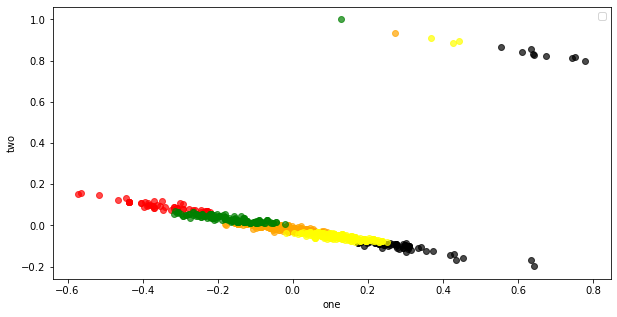

In [195]:
import matplotlib.pyplot as plt

cc_scaled_pca['cluster'] = pred.tolist()

# target 별 분리
cc_scaled_pca_0 = cc_scaled_pca[cc_scaled_pca['cluster'] == 0]
cc_scaled_pca_1 = cc_scaled_pca[cc_scaled_pca['cluster'] == 1]
cc_scaled_pca_2 = cc_scaled_pca[cc_scaled_pca['cluster'] == 2]
cc_scaled_pca_3 = cc_scaled_pca[cc_scaled_pca['cluster'] == 3]
cc_scaled_pca_4 = cc_scaled_pca[cc_scaled_pca['cluster'] == 4]


# target 별 시각화
plt.figure(figsize=(10,5))
plt.scatter(cc_scaled_pca_0['one'], cc_scaled_pca_0['two'], color = 'orange', alpha = 0.7)
plt.scatter(cc_scaled_pca_1['one'], cc_scaled_pca_1['two'], color = 'red', alpha = 0.7)
plt.scatter(cc_scaled_pca_2['one'], cc_scaled_pca_2['two'], color = 'black', alpha = 0.7)
plt.scatter(cc_scaled_pca_3['one'], cc_scaled_pca_3['two'], color = 'yellow', alpha = 0.7)
plt.scatter(cc_scaled_pca_4['one'], cc_scaled_pca_4['two'], color = 'green', alpha = 0.7)

plt.xlabel('one')
plt.ylabel('two')
plt.legend()
plt.show()